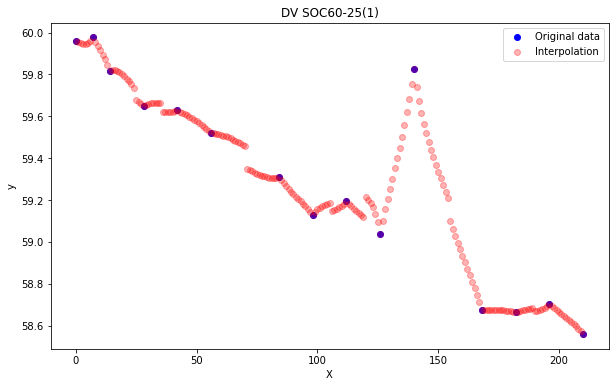

      days   Capacity
0      0.0  59.961800
1      1.0  59.954678
2      2.0  59.949919
3      3.0  59.947440
4      4.0  59.947478
..     ...        ...
206  206.0  58.607838
207  207.0  58.597093
208  208.0  58.585590
209  209.0  58.573182
210  210.0  58.559700

[211 rows x 2 columns]


In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Create a sample DataFrame
data = {
    'X': [0, 7, 14, 28, 42, 56, 84, 98, 112, 126, 140, 168, 182, 196, 210],
    'y': [59.9618, 59.9766, 59.8146, 59.6472, 59.6288, 59.5183, 59.3115, 59.1279, 59.1970, 59.0386, 59.8276, 58.6734, 58.6630, 58.7052, 58.5597]
}

df = pd.DataFrame(data)

# Extract data from the DataFrame
X = df[['X']].values
y = df['y'].values

# Create a KNN regression model
k = 3  # Number of neighbors to consider
knn_regressor = KNeighborsRegressor(n_neighbors=k, weights='distance')

# Fit the model on the data
knn_regressor.fit(X, y)

# Generate 140 data points for interpolation
X_interp = np.linspace(0, 210, 211).reshape(-1, 1)

# Predict y-values for the interpolated data
y_interp = knn_regressor.predict(X_interp)

# Create a DataFrame for the interpolated data
interp_data = {'days': X_interp.flatten(), 'Capacity': y_interp}
interp_df = pd.DataFrame(interp_data)

excel_filename = 'i1.xlsx'
interp_df.to_excel(excel_filename, index=False)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.scatter(interp_df['days'], interp_df['Capacity'], color='red', label='Interpolation', alpha=0.3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('DV SOC60-25(1)')
plt.legend()
plt.show()

# Display the interpolated DataFrame
print(interp_df)